# Project One - visualization future stock price/test portfolio


In [15]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import datetime 
import pandas_datareader.data as web
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

style.use('ggplot')

In [16]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Pull in data using Yahoo Finance

In [17]:
#Downloading stock infromatino from Yahoo Finance
#aapl_df = yf.download("aapl", start='2016-04-05', end="2021-04-01")
#tsla_df2 = yf.download("tsla", start='2015-03-03', end="2019-04-23")
#amzn_df2 = yf.download("amzn", start='2015-03-03', end="2019-04-23")
#msft_df2 = yf.download("msft", start='2015-03-03', end="2019-04-23")
#goog_df2 = yf.download("goog", start='2015-03-03', end="2019-04-23")

#Dropping extra columns and renaming close column to be able to combine data into a clean data frame for analysis
#aapl_df = aapl_df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
#tsla_df2 = tsla_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'TSLA'})
#amzn_df2 = amzn_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'AMZN'})
#msft_df2 = msft_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'MSFT'})
#goog_df2 = goog_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'GOOG'})

In [18]:
#Set the start date and end date to pull up to 5 years of data
startdate = '2016-04-05'
today = datetime.today().strftime('%Y-%m-%d')

startdate, today

('2016-04-05', '2021-04-07')

In [28]:
#Choose a stock and pull the stock price via Yahoo using DataReader to test MC simualation on Stock Price
ticker = ('AMZN')
price = web.DataReader(ticker, data_source = 'yahoo', start = startdate, end = today)['Adj Close']


In [29]:
#Display data for the adjusted close price from Yahoo
price

Date
2016-04-05     586.140015
2016-04-06     602.080017
2016-04-07     591.429993
2016-04-08     594.599976
2016-04-11     595.929993
                 ...     
2021-03-31    3094.080078
2021-04-01    3161.000000
2021-04-05    3226.729980
2021-04-06    3223.820068
2021-04-07    3279.389893
Name: Adj Close, Length: 1261, dtype: float64

In [30]:
#Calculate daily return and volatiltiy so these variables can be leveraged for the MC Simulation
daily_return = price.pct_change()
daily_vol = daily_return.std()

#View data to validate the calculation values
daily_return, daily_vol

(Date
 2016-04-05         NaN
 2016-04-06    0.027195
 2016-04-07   -0.017689
 2016-04-08    0.005360
 2016-04-11    0.002237
                 ...   
 2021-03-31    0.012696
 2021-04-01    0.021628
 2021-04-05    0.020794
 2021-04-06   -0.000902
 2021-04-07    0.017237
 Name: Adj Close, Length: 1261, dtype: float64,
 0.018543166037530985)

In [31]:
#Define a value for last price to leverage in the MC simulation graph
last_price = price[-1]
last_price

3279.389892578125

In [32]:
#Monte Carlo Simulation setup with plan to run 50 scenarios for one year stock price 
num_simu = 500
num_days = 252

#Create DataFrame for simulation
simulation_df = pd.DataFrame()

In [33]:
#Function created for MC daily price similation for one year

for x in range(num_simu):
    count = 0
    daily_vol = daily_return.std()
    
    price_series = []
    
    prices = last_price *(1 + np.random.normal(0, daily_vol))
    price_series.append(prices)
    
    for y in range(num_days):
        if count == 251:
            break
        prices = price_series[count]*(1+np.random.normal(0, daily_vol))
        price_series.append(prices)
        count += 1
    
    simulation_df[x] = price_series


simulation_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3268.221660,3305.695574,3252.817986,3303.917492,3265.267522,3183.522841,3225.046939,3215.317234,3290.489479,3251.163917,...,3166.985315,3201.020118,3299.406236,3224.344822,3224.399637,3199.020792,3299.092989,3273.493660,3258.239475,3272.864604
1,3271.363552,3266.622942,3229.904556,3269.662276,3251.712393,3261.456747,3161.860112,3261.688014,3421.451641,3171.929891,...,3170.822358,3208.767100,3232.637929,3068.501913,3186.359964,3207.791675,3300.248283,3247.940071,3202.781670,3261.362811
2,3275.047439,3210.421843,3158.308836,3269.076464,3330.416879,3351.161895,3113.375546,3255.113252,3397.655312,3302.199130,...,3121.406582,3283.178472,3264.406251,3091.784395,3283.119904,3191.647268,3234.414522,3112.253246,3230.949072,3329.939235
3,3324.210797,3329.681944,3203.695395,3346.607999,3283.473918,3363.831029,3125.658941,3344.746780,3472.642898,3292.856749,...,3172.994923,3239.152175,3193.334660,3127.697043,3225.574553,3110.353857,3188.123794,3153.825568,3200.747631,3317.152984
4,3258.418116,3329.584320,3168.913677,3279.417603,3307.788773,3392.150338,3076.531140,3386.301371,3513.725577,3387.553092,...,3244.119878,3222.049700,3169.656450,3076.437351,3238.778015,3045.526123,3172.933413,3202.934715,3258.695786,3376.137935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,4479.583620,4371.486160,3309.576569,1467.707989,4201.912606,3773.109698,3317.222585,4848.660507,2706.572247,3609.248970,...,2859.839913,4294.370159,2201.655172,3775.261487,2911.437124,3758.847753,2558.972348,2631.061438,2697.818616,2588.535431
248,4462.251796,4442.398928,3326.410121,1489.947316,4162.952196,3745.831621,3296.845680,4807.261333,2797.731238,3702.987293,...,2830.681352,4329.773217,2193.879458,3818.047485,2969.415337,3815.885642,2618.877498,2689.747649,2731.431391,2559.080419
249,4262.079989,4537.094150,3148.074595,1506.171674,4106.914533,3735.804657,3194.038097,4870.931310,2778.149940,3751.807782,...,2769.965767,4277.024043,2165.579822,3802.505489,2943.647133,3881.255696,2575.976836,2676.104817,2698.958423,2600.787672
250,4442.910869,4625.109321,3064.952734,1538.400460,4114.302076,3772.948094,3209.321331,5068.116270,2798.216610,3777.044268,...,2703.797180,4238.245907,2153.569487,3810.507773,2970.805265,3921.659294,2532.788156,2624.427839,2654.035022,2577.001096


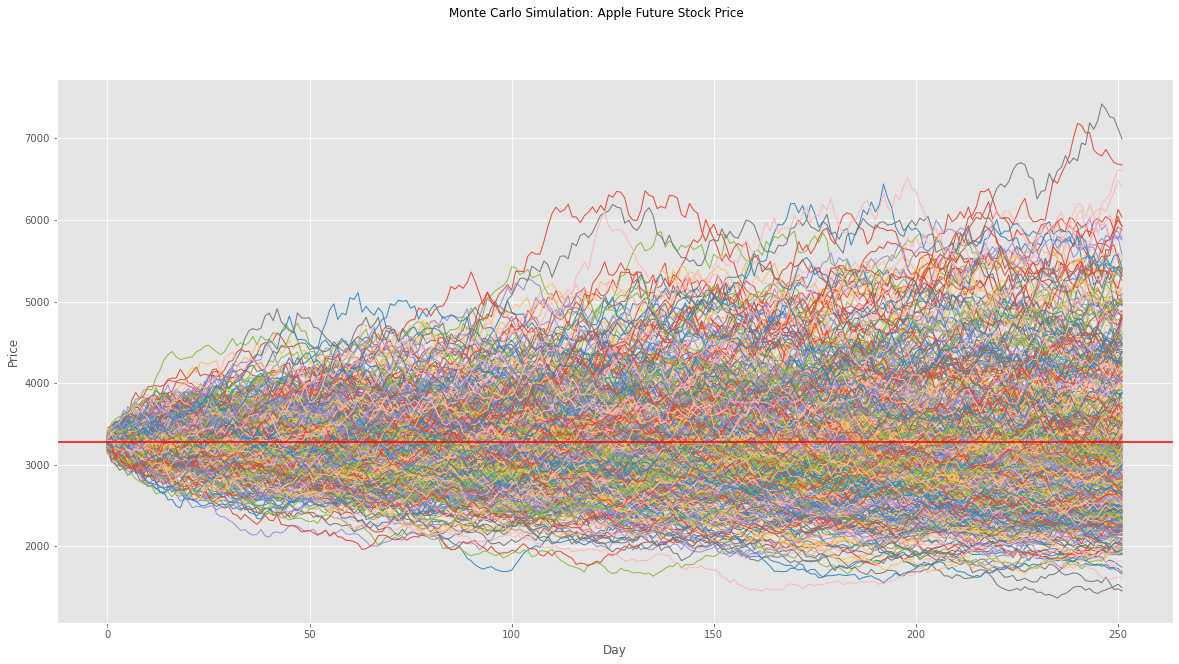

In [34]:
#Graph results to display future price volitity in the model
fig = plt.figure(figsize=(20,10))
fig.suptitle('Monte Carlo Simulation: Apple Future Stock Price')
plt.plot(simulation_df, lw = 1)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [35]:
# Calculate 95% confidence intervals for final cumulative returns
confidence_interval = simulation_df.iloc[-1, :].quantile(q=[0.025, 0.975])

#Calculate and display confidence metrics 
metrics = simulation_df.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
final_stats = metrics.append(ci_series)
final_stats

count            500.000000
mean            3308.863741
std             1003.877370
min             1455.478349
25%             2567.594974
50%             3087.837050
75%             3913.580630
max             6993.460761
95% CI Lower    1953.047500
95% CI Upper    5555.150031
Name: 251, dtype: float64

In [36]:
# Set initial investment on 200 shares of stock in selected stock
initial_shares = 200
initial_investment = round(initial_shares * last_price,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(final_stats[8]*initial_shares,2)
ci_upper = round(final_stats[9]*initial_shares,2)

# Print results
print(f"There is a 95% chance that if you invest ${initial_investment} to purchase {initial_shares} shares in the {ticker}"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that if you invest $655877.98 to purchase 200 shares in the AMZN over the next year will end within in the range of $390609.5 and $1111030.01
